In [ ]:
!pip install opencv-contrib-python==4.4.0.44

In [1]:
## The imports 
import numpy as np
from PIL import Image 
import cv2
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from numpy import random
from time import time
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance

In [2]:
#define Variables
UTLEFT_PATH = '/content/drive/MyDrive/Machine Vision/HW2/Images/uttower_left.jpg'
UTRIGHT_PATH = '/content/drive/MyDrive/Machine Vision/HW2/Images/uttower_right.jpg'

In [3]:
# We need to read the images that are located in our files
grey_img1 = cv2.imread(UTLEFT_PATH, 0) 
grey_img2 = cv2.imread(UTRIGHT_PATH, 0) 
                        


In [4]:
#just for the image
color_img1 = cv2.imread(UTLEFT_PATH)
color_img2 = cv2.imread(UTRIGHT_PATH)

color_img1    = cv2.cvtColor(color_img1, cv2.COLOR_BGR2RGB)
color_img2  = cv2.cvtColor(color_img2, cv2.COLOR_BGR2RGB)

N, M, _ = color_img2.shape

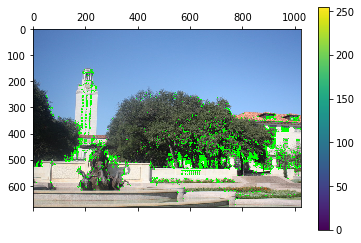

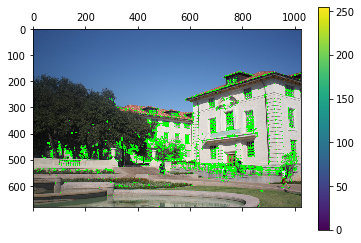

In [5]:
dst1 = cv2.cornerHarris(grey_img1,2,3,0.04)
dst2 = cv2.cornerHarris(grey_img2,2,3,0.04)

#result is dilated for marking the corners, not important
dst1 = cv2.dilate(dst1,None)
dst2 = cv2.dilate(dst2,None)


main_img1 = cv2.imread(UTLEFT_PATH)
main_img2 = cv2.imread(UTRIGHT_PATH)

main_img1    = cv2.cvtColor(main_img1, cv2.COLOR_BGR2RGB)
main_img2  = cv2.cvtColor(main_img2, cv2.COLOR_BGR2RGB)

# Threshold for an optimal value, it may vary depending on the image.
color_img1[dst1>0.01*dst1.max()]=[0, 255, 0]
color_img2[dst2>0.01*dst2.max()]=[0, 255, 0]


plt.matshow(color_img1);
plt.colorbar()
plt.show()

plt.matshow(color_img2);
plt.colorbar()
plt.show()

In [6]:
SIFT = cv2.SIFT_create()
BF = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# we will extract the keys of the sift
kpsA, featuresA = SIFT.detectAndCompute(grey_img1, mask = None)
kpsB, featuresB = SIFT.detectAndCompute(grey_img2, mask = None)

In [7]:
dist_matrix = np.zeros((featuresA.shape[0], featuresB.shape[0]))
# we will cal the distance and give it to the matrix
for i in range(featuresA.shape[0]):
  for j in range(featuresB.shape[0]):
    dist_matrix[i][j] = distance.euclidean(featuresA[i], featuresB[j])

In [8]:
# we will make a vector out of it
min_dist = np.argmin(dist_matrix, axis=1)
min_dist = min_dist.reshape(-1, 1)
row_idx = np.arange(dist_matrix.shape[0])
row_idx = row_idx.reshape(-1, 1)
concat_dist = np.hstack((row_idx, min_dist))

In [9]:
#apply a threshold
Treshold_Dist = 90
Homography_Dist = 190


In [39]:
affine_idx = [] # we will make the affine index
for i in range(concat_dist.shape[0]):
  if dist_matrix[concat_dist[i,0], concat_dist[i,1]] < Treshold_Dist:
    affine_idx.append(i)
affine_idx = np.array(affine_idx)

In [40]:
affine_point1 = np.array([kpsA[idx].pt for idx in affine_idx])
affine_point2 = np.array([kpsB[idx].pt for idx in concat_dist[affine_idx][:,1]])

In [41]:
Homography_idx = [] # we will make the homography index
for i in range(concat_dist.shape[0]):
  if dist_matrix[concat_dist[i,0], concat_dist[i,1]] < Homography_Dist:
    Homography_idx.append(i)
Homography_idx = np.array(Homography_idx)

In [59]:
Homography_point1 = np.array([kpsA[idx].pt for idx in Homography_idx])
Homography_point2 = np.array([kpsB[idx].pt for idx in concat_dist[Homography_idx][:,1]])

In [73]:
diff_affine = affine_point1 - affine_point2 #in this part we will make the new image
diff_affine = np.round(np.mean(diff_affine, axis=0))
new_image = np.zeros((N+int(diff_affine[1]), M+int(diff_affine[0]), 3))

new_image[0:(0+N),0:(M)] = main_img1
new_image[(int(diff_affine[1])):(N+int(diff_affine[1])),(int(diff_affine[0])):(M+int(diff_affine[0]))] = main_img2

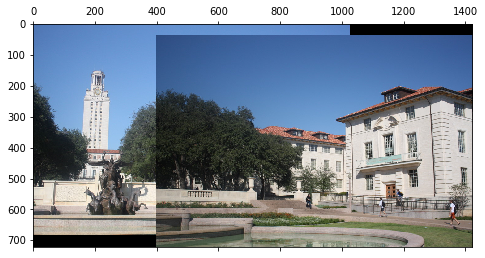

In [74]:
plt.matshow(new_image/255);
plt.show()

In [75]:
diff_Homography = Homography_point1 - Homography_point2 #in this part we will make the new image
diff_Homography = np.round(np.mean(diff_Homography, axis=0))
new_image = np.zeros((N+int(diff_Homography[1]), M+int(diff_Homography[0]), 3))

new_image[0:(0+N),0:(M)] = main_img1
new_image[(int(diff_Homography[1])):(N+int(diff_Homography[1])),(int(diff_Homography[0])):(M+int(diff_Homography[0]))] = main_img2

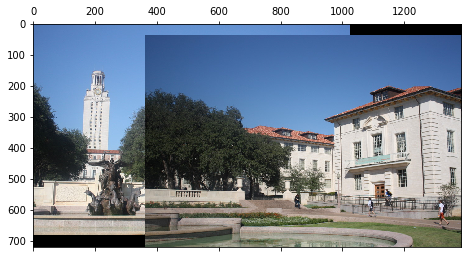

In [76]:
plt.matshow(new_image/255);
plt.show()